In [2]:
pip install pandas

     ---------------------------------------- 11.6/11.6 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 346.6/346.6 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

     -------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import chardet

In [16]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached chardet-5.2.0-py3-none-any.whl (199 kB)


In [8]:
# Baca file secara byte
with open('Data.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


In [9]:
df = pd.read_csv('Data.csv', encoding='UTF-16')

In [10]:
df

,Substance,Author,Year,Output Id,Genotoxicity
0,(-)-17-Oxosparteine,EFSA CONTAM,2019,3321,Negative
1,"(-)-3,7-Dimethyl-6-octen-1-ol",EFSA CEF,2013,2180,Negative
2,"(-)-3,7-Dimethyl-6-octen-1-ol",EFSA FEEDAP,2016,2864,Not determined
3,(-)-Alpha-cedrene,EFSA AFC,2008,2299,Not determined
4,(-)-Alpha-cedrene,EFSA CEF,2010,2039,Not determined
...,...,...,...,...,...
10822,Zinc sulphate monohydrate,EFSA FEEDAP,2012,198,Negative
10823,Zinc sulphate monohydrate,EFSA FEEDAP,2012,188,No data
10824,Zinc sulphate monohydrate,EFSA FEEDAP,2015,2632,Negative
10825,Zoxamide,EFSA,2017,2994,Other


In [11]:
#Missing value 
nan_data = df[df.isna().any(axis=1)]
nan_data 

,Substance,Author,Year,Output Id,Genotoxicity


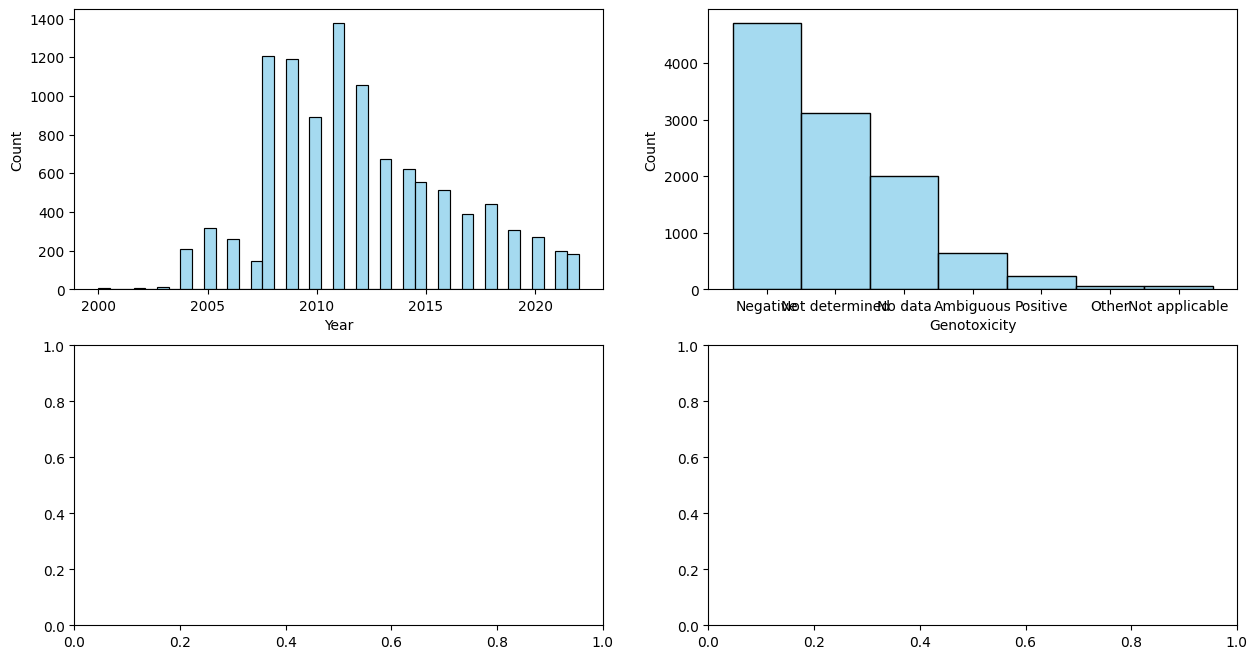

In [20]:
#visualization
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df, x="Year", ax=axes[0,0], color="skyblue")  
sns.histplot(data=df, x="Genotoxicity", ax=axes[0,1], color="skyblue")
plt.show()                     

In [21]:
df_sorted = df.sort_values(by='Genotoxicity')

In [22]:
df_sorted

,Substance,Author,Year,Output Id,Genotoxicity
3747,Allyl cyclohexanevalerate,EFSA CEF,2014,2498,Ambiguous
4796,Chromium nitrate,EFSA ANS,2009,518,Ambiguous
4799,Chromium(III),EFSA ANS,2008,562,Ambiguous
4800,Chromium(III),EFSA ANS,2009,518,Ambiguous
4801,Chromium(III),EFSA ANS,2009,519,Ambiguous
...,...,...,...,...,...
3996,"Arsenic, inorganic derivates",EFSA CONTAM,2005,42,Positive
4793,Chromium (VI),EFSA CONTAM,2014,2468,Positive
4900,Citrinin,EFSA CONTAM,2012,588,Positive
3899,alpha-Zearalenol glucopyranosides and sulfates,EFSA CONTAM,2016,2801,Positive


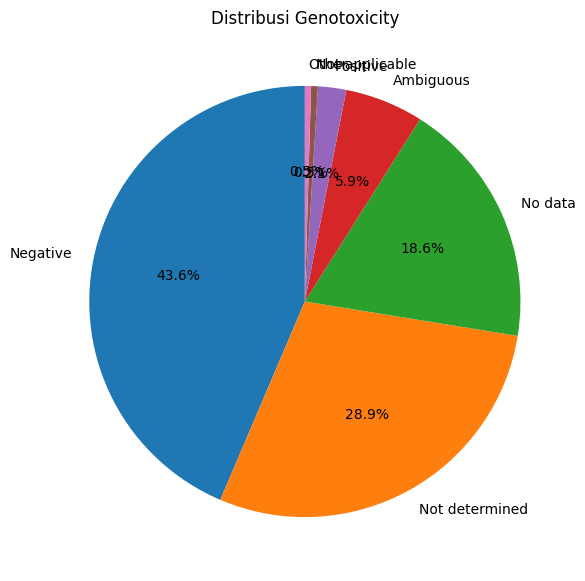

In [29]:
# Menghitung frekuensi setiap kategori pada kolom 'Genotoxicity'
genotox_count = df['Genotoxicity'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(7, 7))  # Mengatur ukuran plot agar proporsional
plt.pie(genotox_count, labels=genotox_count.index, autopct='%1.1f%%', startangle=90)

# Menambahkan judul
plt.title('Distribusi Genotoxicity')

# Menampilkan pie chart
plt.show()

In [31]:
# Menampilkan kategori unik di kolom 'Genotoxicity'
unique_categories = df['Genotoxicity'].unique()
print(unique_categories)
# Menghitung frekuensi setiap kategori di kolom 'Genotoxicity'
category_counts = df['Genotoxicity'].value_counts()
print(category_counts)

['Negative' 'Not determined' 'No data' 'Ambiguous' 'Positive' 'Other'
 'Not applicable']
Genotoxicity
Negative          4719
Not determined    3125
No data           2012
Ambiguous          637
Positive           229
Not applicable      55
Other               50
Name: count, dtype: int64


In [ ]:
sns.relplot(
    data=tips,
    x="Year", y="Genotoxicity", hue="Genotoxicity", style="time",
)